# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [6]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [41]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [42]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [43]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [45]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 640x480 with 0 Axes>

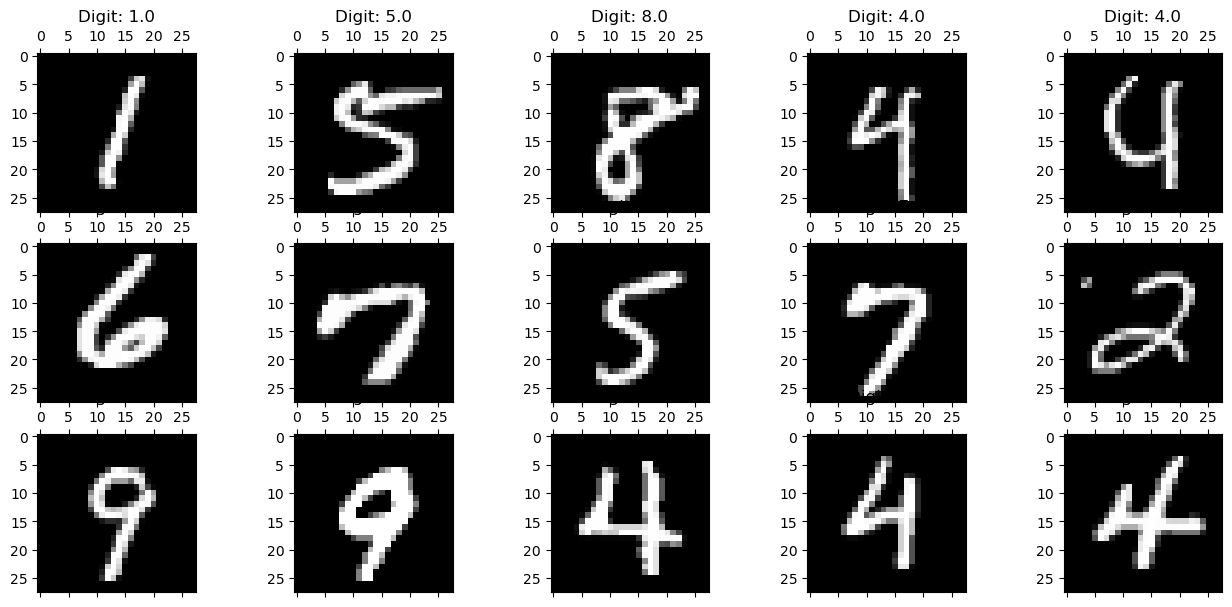

In [46]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, shuffle=True)

In [54]:
## Normalization : 각각의 값들을 0과 1사이의 값으로 정규화 시켜주기 위해 255로 나누어줌.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [55]:
print('shape of X_train : {}'.format(X_train.shape))
print('shape of y_train : {}'.format(y_train.shape))
print('shape of X_test : {}'.format(X_test.shape))
print('shape of y_test : {}'.format(y_test.shape))

shape of X_train : (56000, 784)
shape of y_train : (56000, 1)
shape of X_test : (14000, 784)
shape of y_test : (14000, 1)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

### PCA

In [56]:
from sklearn.decomposition import PCA

pca = PCA()
pca_array = pca.fit_transform(X_train)
pca_df = pd.DataFrame(pca_array, columns = [f"pca{num+1}" for num in range(pca_array.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca775,pca776,pca777,pca778,pca779,pca780,pca781,pca782,pca783,pca784
0,-1.167479,1.731736,0.881492,0.654684,-0.140838,0.779714,1.855039,1.431612,0.462121,-1.902549,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,3.322413e-14,0.000000e+00
1,0.921795,-0.977712,-1.427701,1.285191,-1.295940,-0.742784,-1.002371,0.203782,-0.547226,-2.451480,...,7.153752e-18,-2.312713e-18,3.363771e-18,-8.119021e-18,0.0,0.0,0.0,0.0,-2.206964e-16,-3.267077e-15
2,1.239287,3.609059,-1.669538,1.677825,2.579232,1.253237,-2.777806,0.486890,-0.002325,0.529942,...,7.606464e-19,-6.938428e-18,-1.763652e-18,7.566758e-18,0.0,0.0,0.0,0.0,-1.456712e-16,8.233520e-16
3,-0.309261,0.700930,2.287572,-1.484580,0.066076,1.488764,-0.132881,-2.267646,-0.364858,-1.033479,...,-2.353388e-19,-1.716229e-18,9.832918e-18,-1.976279e-18,0.0,0.0,0.0,0.0,2.141715e-18,1.190842e-15
4,-0.378904,-2.991685,-0.137639,1.680451,0.074688,1.107816,-0.772054,0.057615,-1.128276,0.483314,...,-3.360595e-18,5.801674e-18,1.590254e-18,-1.161085e-17,0.0,0.0,0.0,0.0,8.774585e-18,-2.815438e-15


#### 1. 누적 설명률 

In [65]:
result = pd.DataFrame({'설명 가능한 분산' : pca.explained_variance_,
                      '설명률' : pca.explained_variance_ratio_},
                     index = np.array([f"pca{num+1}" for num in range(pca_array.shape[1])]))
result['누적 설명률'] = result['설명률'].cumsum()
result.head(50)

,설명 가능한 분산,설명률,누적 설명률
pca1,5.176022,0.098016,0.098016
pca2,3.779200,0.071565,0.169581
pca3,3.249467,0.061534,0.231115
pca4,2.852284,0.054013,0.285128
pca5,2.586514,0.048980,0.334108
pca6,2.262887,0.042851,0.376959
pca7,1.734072,0.032837,0.409796
pca8,1.521711,0.028816,0.438612
pca9,1.454846,0.027550,0.466162
pca10,1.232951,0.023348,0.489510


일반적으로 누적 설명률이 80% 이상인 지점에서 주성분 개수를 선정한다. 따라서 위의 누적 설명률 표를 통해 보면 주성분 개수가 43개일 때부터 80%를 넘기므로 43개정도로 그 개수를 정할 수 있다.

#### 2. Elbow point

<Figure size 600x600 with 0 Axes>

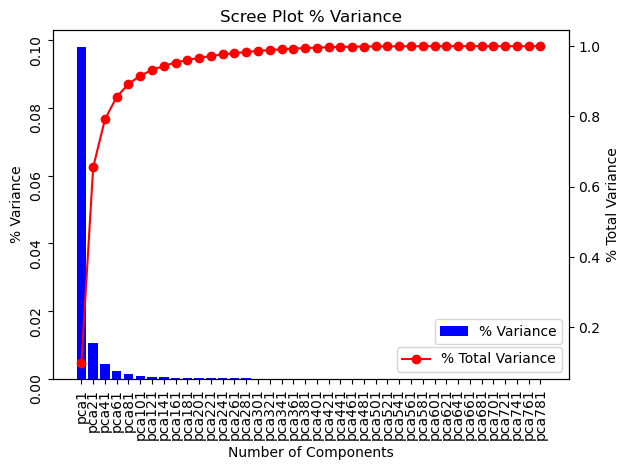

In [98]:
idx = [i for i in np.arange(pca.n_components_) if i % 20 == 0]

fig = plt.figure(figsize = (6,6))
fig.set_facecolor('white')
fig, ax1 = plt.subplots()
plt.title('Scree Plot % Variance')

ax1.bar(result.iloc[idx].index, result.iloc[idx]['설명률'], color = 'b', label = '% Variance')
ax1.set_xlabel('Number of Components')
ax1.legend(loc = (0.74,0.1))
ax1.tick_params(rotation = 90)
ax1.set_ylabel('% Variance')

ax2 = ax1.twinx()
ax2.plot(result.iloc[idx].index, result.iloc[idx]['누적 설명률'], marker='o', c = 'red', label = '% Total Variance')
ax2.legend(loc = 'lower right')
ax2.set_ylabel('% Total Variance')

fig.tight_layout()
plt.show()

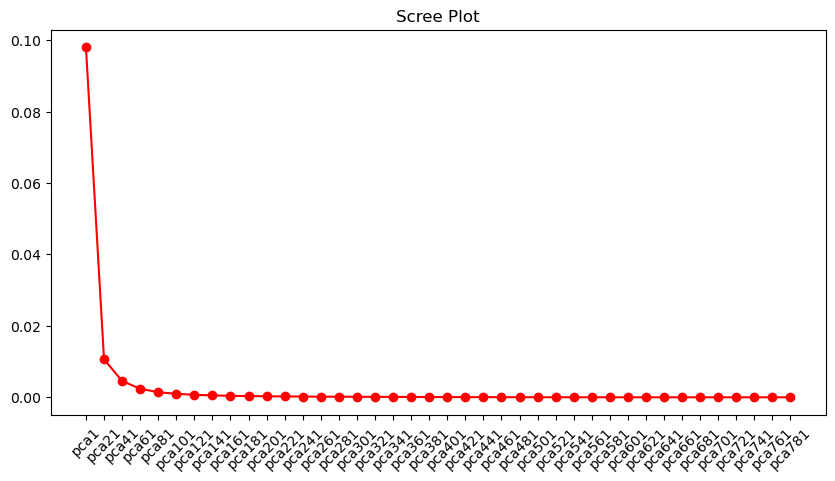

In [101]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Scree Plot')
plt.plot(result.iloc[idx].index,result.iloc[idx]['설명률'], 'ro-')
plt.xticks(rotation = 45)
plt.show()

위의 두 그래프를 통해 Elbow Point를 살펴보면 확실한 값을 정하기는 쉽지 않지만 첫번째 주성분부터 41번째 주성분 사이에서 그 기울기가 급격히 감소한다고 판단할 수 있다. 

최종적으로 PCA에서의 주성분 개수를 **42개**로 설정해 학습시켜보도록 한다.

### LDA

In [121]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda_array = lda.fit_transform(X_train, y_train)
lda_df = pd.DataFrame(lda_array, columns = [f"lda{num+1}" for num in range(lda_array.shape[1])])
lda_df.head()

C:\Users\cts08\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,lda1,lda2,lda3,lda4,lda5,lda6,lda7,lda8,lda9
0,3.177287,-0.073869,1.189395,-0.637306,-1.288024,1.135896,-0.500108,2.188566,-2.491064
1,-0.450893,-0.911215,-1.109378,0.577396,0.019263,0.344006,1.208472,1.153120,-0.695643
2,2.471885,-1.123323,2.220677,2.281814,1.136785,-2.144091,1.317410,0.264678,-1.266254
3,1.270086,-1.307695,-0.297522,-0.377995,1.014452,1.646440,-2.552029,2.127353,0.990953
4,-2.179837,2.123570,0.351626,-2.401322,0.075000,-0.680897,-0.279301,0.646494,0.730464


#### 1. 누적 설명률 

In [123]:
result = pd.DataFrame({'설명률' : lda.explained_variance_ratio_},
                     index = np.array([f"lda{num+1}" for num in range(lda_array.shape[1])]))
result['누적 설명률'] = result['설명률'].cumsum()
result

,설명률,누적 설명률
lda1,0.237521,0.237521
lda2,0.203829,0.441350
lda3,0.176760,0.618110
lda4,0.106156,0.724266
lda5,0.094202,0.818468
lda6,0.070263,0.888731
lda7,0.049980,0.938711
lda8,0.034472,0.973184
lda9,0.026816,1.000000


LDA에서의 누적 설명률 표를 확인해보면 주성분 개수가 5개일 때부터 80%를 넘기므로 5개를 데이터를 설명하기 충분한 주성분 수라고 볼 수 있다.

#### 2. Elbow point

<Figure size 600x600 with 0 Axes>

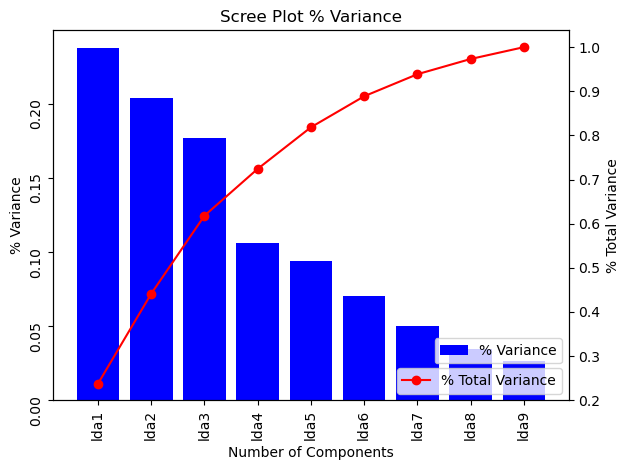

In [125]:
fig = plt.figure(figsize = (6,6))
fig.set_facecolor('white')
fig, ax1 = plt.subplots()
plt.title('Scree Plot % Variance')

ax1.bar(result.index, result['설명률'], color = 'b', label = '% Variance')
ax1.set_xlabel('Number of Components')
ax1.legend(loc = (0.74,0.1))
ax1.tick_params(rotation = 90)
ax1.set_ylabel('% Variance')

ax2 = ax1.twinx()
ax2.plot(result.index, result['누적 설명률'], marker='o', c = 'red', label = '% Total Variance')
ax2.legend(loc = 'lower right')
ax2.set_ylabel('% Total Variance')

fig.tight_layout()
plt.show()

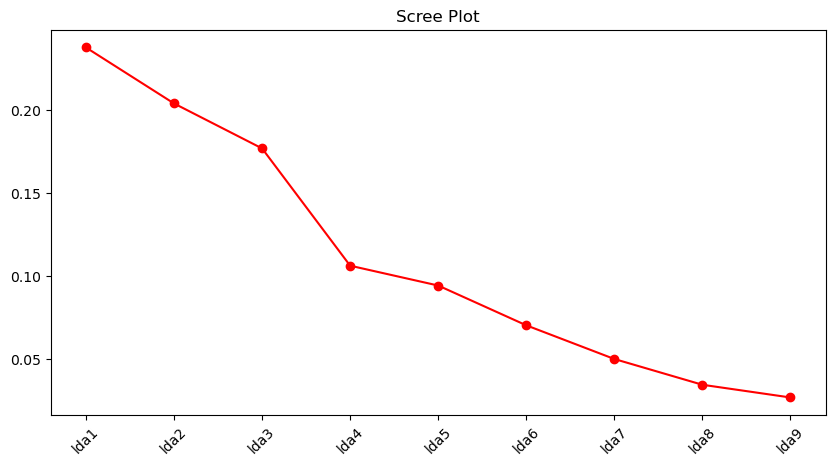

In [126]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Scree Plot')
plt.plot(result.index,result['설명률'], 'ro-')
plt.xticks(rotation = 45)
plt.show()

Scree Plot을 통해서 보면 4번째 주성분에서 급격하게 감소함을 확인할 수 있다.

최종적으로 LDA에서는 두 결과를 적절히 반영하여 주성분 개수를 5개로 설정하여 모델에 학습시켜보도록 한다.

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

## 1. Random Forest

### (원본 데이터)

In [134]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
start = time.time()

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('원본 데이터 accuracy : {0}'.format(accuracy_score(y_test, y_pred)))
print('time :', time.time() - start)

C:\Users\cts08\AppData\Local\Temp\ipykernel_30732\1667559547.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


원본 데이터 accuracy : 0.9681428571428572
time : 29.823618412017822


### (PCA 축소 데이터, n_component = 42)

In [137]:
start = time.time()

pca = PCA(n_components = 42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print('PCA 축소 데이터 accuracy : {0}'.format(accuracy_score(y_test, y_pred)))
print('time :', time.time() - start)

C:\Users\cts08\AppData\Local\Temp\ipykernel_30732\3331718466.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_pca, y_train)


PCA 축소 데이터 accuracy : 0.9547857142857142
time : 34.53515291213989


### (LDA 축소 데이터, n_component = 5)

In [136]:
start = time.time()

lda = LDA(n_components = 5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

model = RandomForestClassifier()
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)

print('PCA 축소 데이터 accuracy : {0}'.format(accuracy_score(y_test, y_pred)))
print('time :', time.time() - start)

C:\Users\cts08\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cts08\AppData\Local\Temp\ipykernel_30732\523220817.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_lda, y_train)


PCA 축소 데이터 accuracy : 0.8456428571428571
time : 18.562058925628662


위의 3가지 방법에 대한 결과를 비교해보도록 한다.
* 가장 높은 정확도는 96.8%로 원본 데이터를 사용했을 때이다.  
* 5개의 차원으로 축소한 LDA 축소 데이터에 대해서 time stamp가 약 18.5초로 가장 빠른 속도를 보인다.
* 반면 속도가 빠르고 차원을 축소한 만큼 정확도에서는 84.5%로 기존의 원본 데이터와 43개의 주성분으로 축소한 PCA 축소 데이터보다 낮은 정확도를 보인다.

특정한 틀 없이 자유롭게 해주시면 됩니다!